# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
import os
from sklearn.svm import SVC
import keras
from keras_preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Conv1D, GlobalMaxPooling1D
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

## Importing Datasets

In [4]:
Real = pd.read_csv('/Users/vaibhavgaurdeveloper/Desktop/true.csv') 
Fake = pd.read_csv('/Users/vaibhavgaurdeveloper/Desktop/fake.csv')

In [6]:
Real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
Real['target'] = 1
Fake['target'] = 0

In [12]:
Fake.shape, Real.shape

((23481, 5), (21417, 5))

In [14]:
# We will remove the last 10 rows for manual testing in the fake dataframe
Fake_Fake_manual_testing = Fake.tail(10)
for i in range(23480, 23470, -1):
    Fake.drop([i], axis=0, inplace=True)

# We will remove the last 10 rows for manual testing in the true dataframe
Real_Real_manual_testing = Real.tail(10)
for i in range(21416, 21406, -1):
    Real.drop([i], axis=0, inplace=True)

# Let's have a look at the change in the shape of both datasets
Fake.shape, Real.shape

((23471, 5), (21407, 5))

In [16]:
Fake['target'] = 0
Real['target'] = 1
Fake.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [18]:
Real.tail()

,title,text,subject,date,target
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [20]:
merge = pd.concat([Fake, Real], axis = 0)
merge.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [22]:
data = pd.concat([Real,Fake],ignore_index = True,sort = False)
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [24]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

target
0    23471
1    21407
Name: count, dtype: int64


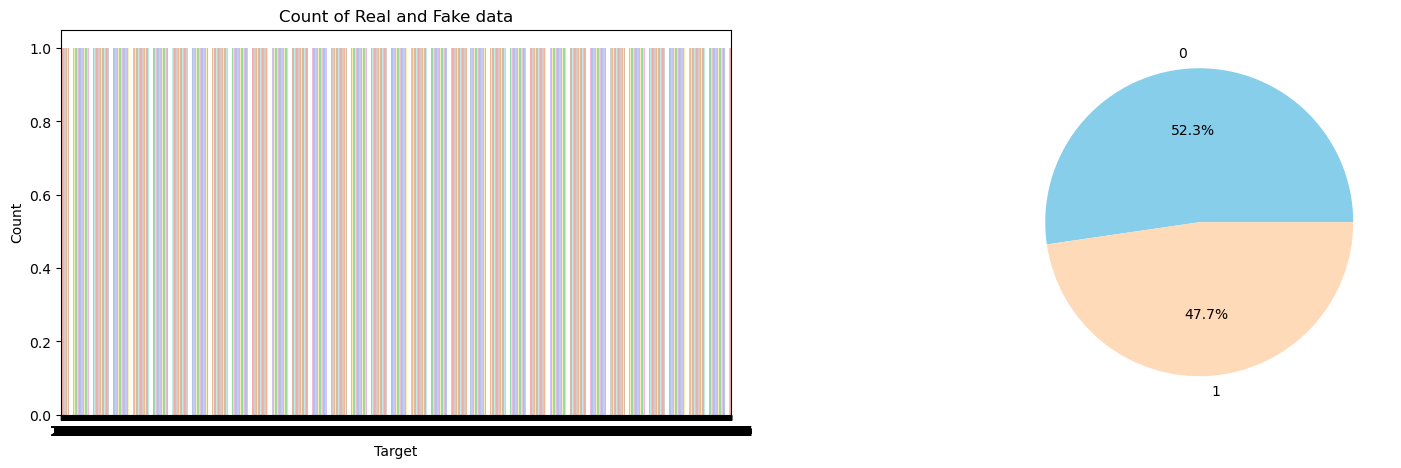

In [26]:
print(data["target"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19,5))
g1 = sns.countplot(data.target,ax=ax[0],palette="pastel");
g1.set_title("Count of Real and Fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Target")
g2 = plt.pie(data["target"].value_counts().values,explode=[0,0],labels=data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()


target
0    23471
1    21407
Name: count, dtype: int64


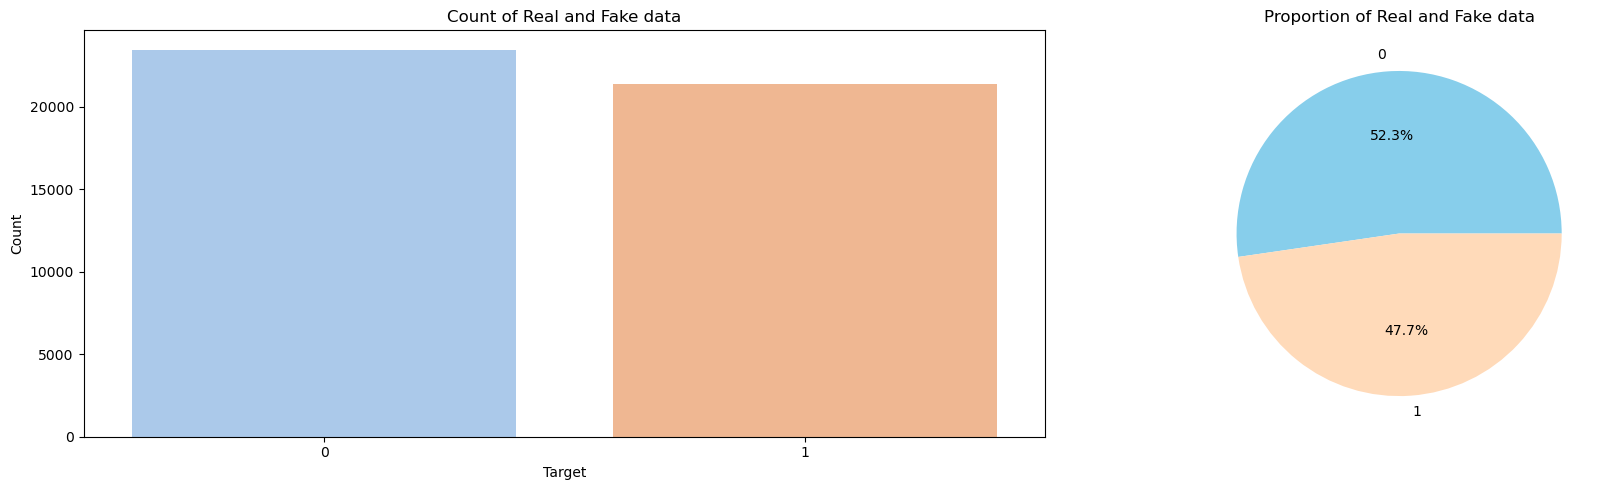

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data["target"].value_counts())

fig, ax = plt.subplots(1, 2, figsize=(19,5))

sns.countplot(x='target', data=data, ax=ax[0], palette="pastel")
ax[0].set_title("Count of Real and Fake data")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Target")

target_counts = data["target"].value_counts()
ax[1].pie(target_counts, explode=[0,0], labels=target_counts.index, autopct='%1.1f%%', colors=['SkyBlue','PeachPuff'])
ax[1].set_title("Proportion of Real and Fake data")

plt.tight_layout()
plt.show()

subject
politicsNews       11272
worldnews          10135
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          768
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

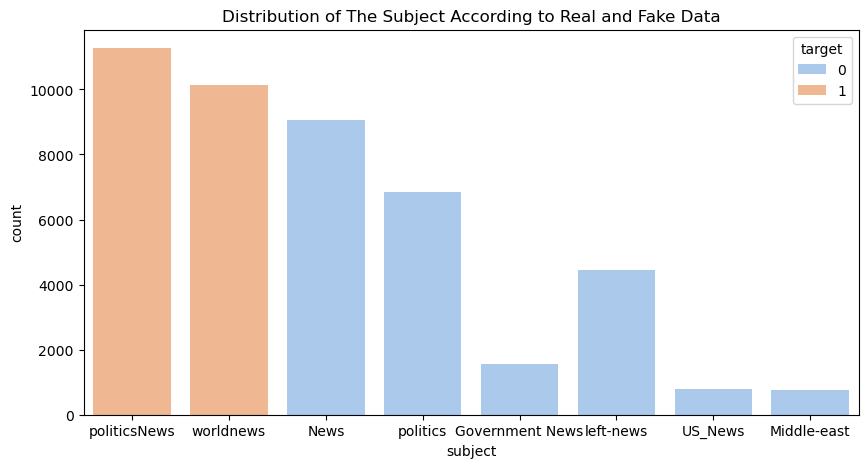

In [28]:
print(data.subject.value_counts())
plt.figure(figsize=(10,5))

ax = sns.countplot(x="subject", hue='target', data=data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")


In [29]:
data['text']=data['subject'] + " " + data['title'] + " " + data['text']
del data['title']
del data['subject']
del data['date']
data.head()

,text,target
0,"politicsNews As U.S. budget fight looms, Repub...",1
1,politicsNews U.S. military to accept transgend...,1
2,politicsNews Senior U.S. Republican senator: '...,1
3,politicsNews FBI Russia probe helped by Austra...,1
4,politicsNews Trump wants Postal Service to cha...,1


In [30]:
first_text = data.text[10]
first_text

'politicsNews Jones certified U.S. Senate winner despite Moore challenge (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory “a new chapter” and pledged to work with both parties. M

In [31]:
!pip install bs4

In [32]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(first_text, "html.parser")
first_text = soup.get_text()
first_text

'politicsNews Jones certified U.S. Senate winner despite Moore challenge (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory “a new chapter” and pledged to work with both parties. M

In [33]:
first_text = re.sub('\[[^]]*\]',' ', first_text)
first_text = re.sub('[^a-zA-Z]',' ',first_text)
first_text = first_text.lower()
first_text

'politicsnews jones certified u s  senate winner despite moore challenge  reuters    alabama officials on thursday certified democrat doug jones the winner of the state s u s  senate race  after a state judge denied a challenge by republican roy moore  whose campaign was derailed by accusations of sexual misconduct with teenage girls  jones won the vacant seat by about        votes  or     percentage points  election officials said  that made him the first democrat in a quarter of a century to win a senate seat in alabama   the seat was previously held by republican jeff sessions  who was tapped by u s  president donald trump as attorney general  a state canvassing board composed of alabama secretary of state john merrill  governor kay ivey and attorney general steve marshall certified the election results  seating jones will narrow the republican majority in the senate to    of     seats  in a statement  jones called his victory  a new chapter  and pledged to work with both parties  m

In [34]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaibhavgaurdeveloper/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
nltk.download("stopwords")
from nltk.corpus import stopwords

first_text = nltk.word_tokenize(first_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhavgaurdeveloper/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
first_text = [ word for word in first_text if not word in set(stopwords.words("english"))]

In [37]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vaibhavgaurdeveloper/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
lemma = nltk.WordNetLemmatizer()
first_text = [ lemma.lemmatize(word) for word in first_text]

first_text = " ".join(first_text)
first_text

'politicsnews jones certified u senate winner despite moore challenge reuters alabama official thursday certified democrat doug jones winner state u senate race state judge denied challenge republican roy moore whose campaign derailed accusation sexual misconduct teenage girl jones vacant seat vote percentage point election official said made first democrat quarter century win senate seat alabama seat previously held republican jeff session tapped u president donald trump attorney general state canvassing board composed alabama secretary state john merrill governor kay ivey attorney general steve marshall certified election result seating jones narrow republican majority senate seat statement jones called victory new chapter pledged work party moore declined concede defeat even trump urged stood claim fraudulent election statement released certification said regret medium outlet reported alabama judge denied moore request block certification result dec election decision shortly canvass

In [39]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords


def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


def remove_punctuations(text):
    return re.sub(r'\[[^]]*\]', '', text)

def remove_characters(text):
    return re.sub(r'[^a-zA-Z\s]', ' ', text)


def remove_stopwords_and_lemmatization(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = nltk.WordNetLemmatizer()
    words = nltk.word_tokenize(text.lower())
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(cleaned_words)

def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

data['text'] = data['text'].apply(cleaning)


In [40]:
data.head()

,text,target
0,politicsnews u budget fight loom republican fl...,1
1,politicsnews u military accept transgender rec...,1
2,politicsnews senior u republican senator let m...,1
3,politicsnews fbi russia probe helped australia...,1
4,politicsnews trump want postal service charge ...,1


In [41]:
!pip install matplotlib wordcloud

In [42]:
import matplotlib.pyplot as plt
from wordcloud import wordcloud, STOPWORDS

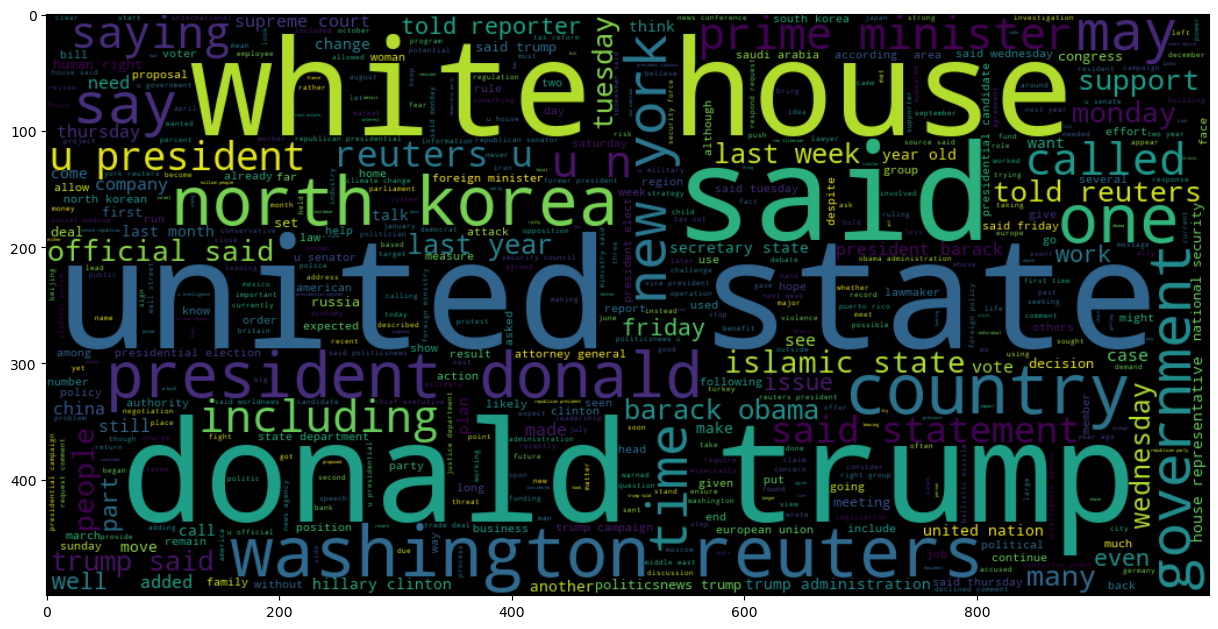

In [43]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')


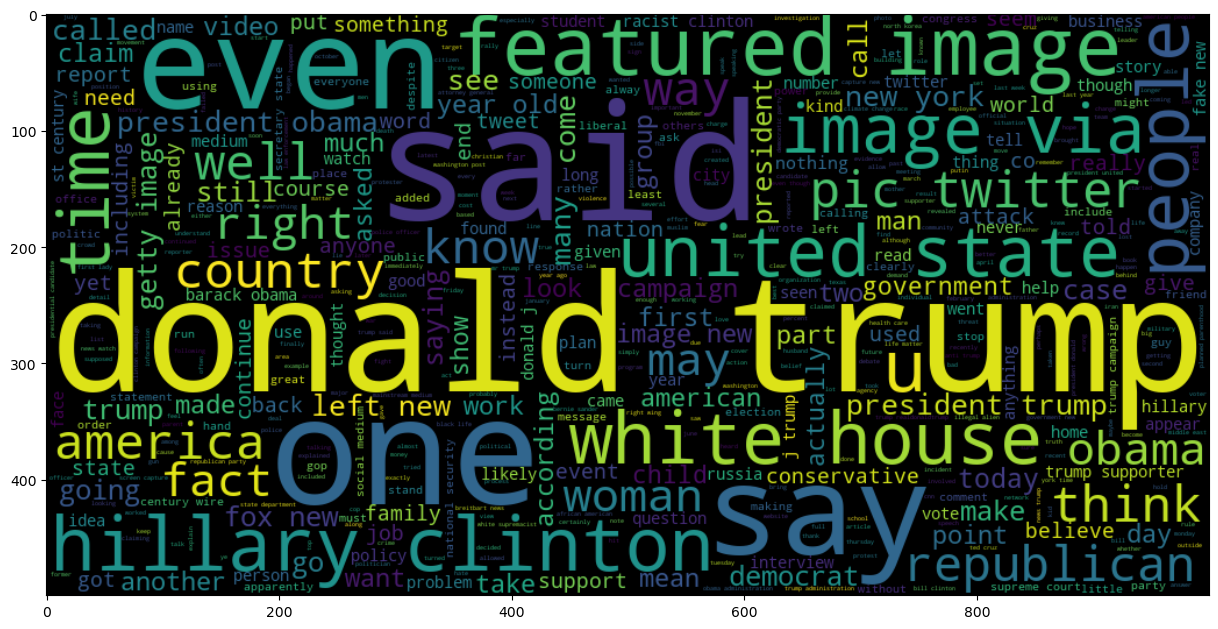

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

In [45]:
from sklearn.model_selection import train_test_split

X = data['text']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [48]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9933155080213903
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4654
           1       0.99      1.00      0.99      4322

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [49]:
pip install streamlit scikit-learn nltk


Note: you may need to restart the kernel to use updated packages.


In [50]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaibhavgaurdeveloper/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhavgaurdeveloper/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

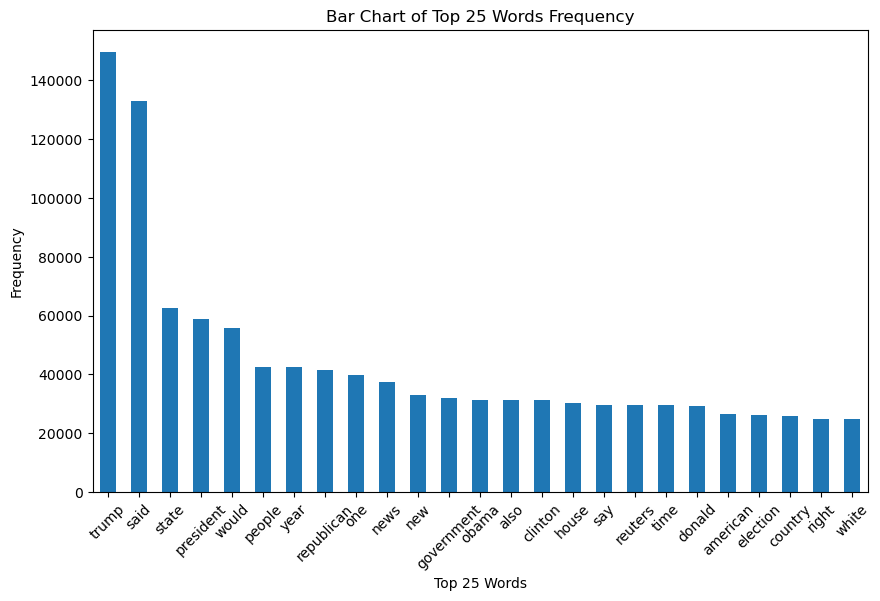

In [51]:
# Now, Let’s plot the bargraph of the top 25 most frequent words.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming 'dataframe' is your pandas DataFrame and it contains a column 'text' with the text data
common_words = get_top_n_words(data['text'], 25)
df1 = pd.DataFrame(common_words, columns=['Word', 'Count'])  # Rename column for clarity

# Plotting directly from df1 without redundant grouping or sorting
df1.plot(
    kind='bar',
    figsize=(10, 6),
    x='Word',  # Specify the column for x-axis labels
    y='Count',  # Specify the column for y-axis labels
    legend=False,  # No need for legend for a single series plot
    title="Bar Chart of Top 25 Words Frequency",
    xlabel="Top 25 Words",
    ylabel="Frequency"
)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [52]:
import re
import pandas as pd
import string
from sklearn.model_selection import train_test_split

def wordopt(t):
    tt = t.lower()
    t = re.sub(r'\[.*?\]', '', t)
    t = re.sub(r'\\W', ' ', t)
    t = re.sub(r'https?://\S+|www\.\S+', '', t)
    t = re.sub(r'<.*?>+', '', t)
    t = re.sub(r'[%s]' % re.escape(string.punctuation), '', t)
    t = re.sub(r'\n', '', t)
    t = re.sub(r'\w*\d\w*', '', t)
    return t

data["text"] = data["text"].apply(wordopt)

# Now we will define the dependent variable and independent variables
x = data["text"]
y = data["target"]

# Splitting the Dataset into a Training and Testing Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [54]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()  
LR.fit(xv_train,y_train)

LogisticRegression()

In [55]:
LR.score(xv_test, y_test)

0.9896613190730837

In [56]:
pred_LR=LR.predict(xv_test)

from sklearn.metrics import classification_report

# Assuming y_test and pred_LR are defined
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5945
           1       0.99      0.99      0.99      5275

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [57]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()  
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [58]:
pred_dt = DT.predict(xv_test)  
DT.score(xv_test, y_test)

0.9975044563279858

In [59]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5945
           1       1.00      1.00      1.00      5275

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [60]:
from sklearn.ensemble import GradientBoostingClassifier 
GBC = GradientBoostingClassifier(random_state=0)  
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [61]:
pred_gbc = GBC.predict(xv_test)  
GBC.score(xv_test, y_test) 

0.9991087344028521

In [62]:
print(classification_report(y_test, pred_gbc)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5945
           1       1.00      1.00      1.00      5275

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [63]:
from sklearn.ensemble import RandomForestClassifier 
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [64]:
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)  

0.9961675579322639

In [65]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5945
           1       1.00      1.00      1.00      5275

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [66]:
def output_label(n):  
    if n == 0:  
        return "Fake News"  
    elif n == 1:  
        return "True News"  

def manual_testing(news):  
    testing_news = {"text": [news]}  
    new_def_test = pd.DataFrame(testing_news)  
    new_def_test["text"] = new_def_test["text"].apply(wordopt)  
    new_x_test = new_def_test["text"]  
    new_xv_test = vectorization.transform(new_x_test)  
    pred_LR = LR.predict(new_xv_test)  
    pred_DT = DT.predict(new_xv_test)  
    pred_GBC = GBC.predict(new_xv_test)  
    pred_RFC = RFC.predict(new_xv_test) 

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(
        output_label(pred_LR[0]), output_label(pred_DT[0]), output_label(pred_GBC[0]), output_label(pred_RFC[0]))
    )

In [67]:
news = str(input())  
manual_testing(news) 

 https://www.reuters.com/business/trump-strikes-tariff-deal-with-japan-auto-stocks-surge-2025-07-23/




LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [112]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(vectorization, open(filename, 'wb')) 

In [114]:
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import streamlit as st
# import requests

# Streamlit page configuration
st.set_page_config(page_title="News Article Classification", layout="wide")

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load and process data
@st.cache_data
def load_and_process_data(sample_size=1000):
    Fake = pd.read_csv("/Users/vaibhavgaurdeveloper/Desktop/fake.csv")
    Real = pd.read_csv("/Users/vaibhavgaurdeveloper/Desktop/true.csv")
    Real['label'] = 1
    Fake['label'] = 0
    news_dataframe = pd.concat([Fake.sample(sample_size, random_state=42), Real.sample(sample_size, random_state=42)], axis=0).reset_index(drop=True)
    return news_dataframe

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def stem_content(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if word not in stop_words]
    return ' '.join(stemmed_content)

# Vectorize data
@st.cache_data
def vectorize_data(news_dataframe):
    news_dataframe['content'] = news_dataframe['text'].apply(stem_content)
    vectorizer = TfidfVectorizer(max_features=500)
    X = vectorizer.fit_transform(news_dataframe['content'])
    y = news_dataframe['label'].values
    return X, y, vectorizer

# Train model
@st.cache_data
def train_model(_X, y):
    X_train, X_test, y_train, y_test = train_test_split(_X, y, test_size=0.2, stratify=y, random_state=2)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    return model, accuracy

# Load data and train model
news_dataframe = load_and_process_data()
X, y, vectorizer = vectorize_data(news_dataframe)
model, accuracy = train_model(X, y)

# Streamlit app
st.title('News Article Classification')
st.write("""
    Welcome to the News Article Classification! This application uses Natural Language Processing (NLP) techniques to classify news articles as real or fake. 
     and click on 'Predict' to see the result.
""")

# Input form
input_text = ""
uploaded_file = None
with st.form(key='news_form'):
    input_text = st.text_area('📝 Enter News Article', height=250)
    submit_button = st.form_submit_button(label='Predict')
    clear_button = st.form_submit_button(label='Clear Input')

# If clear button is clicked, clear the input fields
if clear_button:
    input_text = ""
    uploaded_file = None
    st.experimental_rerun()

# Only perform prediction when submit button is clicked
if submit_button:
    if input_text.strip():
        with st.spinner('Analyzing the article...'):
            processed_input = stem_content(input_text)
            input_data = vectorizer.transform([processed_input])
            pred = model.predict(input_data)[0]
            confidence = model.predict_proba(input_data)[0][pred]
            result = 'The News is **Fake**' if pred == 1 else 'The News is **Real**'
            st.success(result)
           
    else:
        
            st.error("Please enter some text to analyze.")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhavgaurdeveloper/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-07-23 14:28:24.222 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-07-23 14:28:24.224 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-07-23 14:28:24.224 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-07-23 14:28:24.453 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-07-23 14:28:24.454 No runtime found, using MemoryCacheStorageManager
2025-07-23 14:28:25.252 No runtime found, using MemoryCacheStorageManager
2025-07-23 14:28:28.776 No runtime found, using MemoryCacheStorageManager
2025-07-23 14:28:28.785 Session state does not function when running a script without `streamlit run`


In [ ]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8503
  Network URL: http://192.168.29.202:8503

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhavgaurdeveloper/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-07-23 14:28:31.532 Uncaught app exception
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/streamlit/runtime/scriptrunner/exec_code.py", line 85, in exec_func_with_error_handling
    result = func()
             ^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/streamlit/runtime/scriptrunner/script_runner.py", line 576, in code_to_exec
    exec(code, module.__dict__)
  File "/Users/vaibhavgaurdeveloper/Desktop/News_Article_Classification ML/app.py", line 57, in <module>
    news_dataframe = load_and_process_data()
                     ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/streamlit/runtime/caching/cache_utils.p